# 2022 Cyclistic Data Analytics

## Analysis done by Philip Mwema

- **Cyclistic**, a bike-share company cinsisting of 5,824 bicycles and 692 docking stations in Chicago, USA. Cyclistic offers traditional bikes,  reclining bikes, hand tricycles, and cargo bikes making the bike-share more inclusive to everybody including people with disabilities and riders who can’t use a standard two-wheeled bike. The majority of riders opt for traditional bikes; about 8% of riders use the assistive options. Cyclistic users are more likely to ride for leisure, but about 30% use them to commute to work each day. 

* The purpose of this analysis is comparing how causal members and annual paying subscribers differ.
* Data of the last 12 months was downloaded from [Cyclistic’s historical trip data](https://divvy-tripdata.s3.amazonaws.com/index.html), for the last 12 months, that is from January 2022 to December 2022.

###### Importing Packages

In [2]:
#Importing pacakges to be used

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

## Data Wrangling
Data wrangling will be done in three steps:
1. Data Gathering 
2. Data Assessment
3. Data Cleaning

## 1. Data Gathering
- Data of the last 12 months was downloaded from [Cyclistic’s historical trip data](https://divvy-tripdata.s3.amazonaws.com/index.html), for the last 12 months, that is from January 2022 to December 2022. Notice that each month will have its own dataset hence we will download 12 different datasets and merge into one csv data.

In [3]:
#Loading the 12 datasets for the months ending Dec 2022
jan = pd.read_csv('202201-divvy-tripdata.csv')
feb = pd.read_csv('202202-divvy-tripdata.csv')
mar = pd.read_csv('202203-divvy-tripdata.csv')
apr = pd.read_csv('202204-divvy-tripdata.csv')
may = pd.read_csv('202205-divvy-tripdata.csv')
jun = pd.read_csv('202206-divvy-tripdata.csv')
jul = pd.read_csv('202207-divvy-tripdata.csv')
aug = pd.read_csv('202208-divvy-tripdata.csv')
sep = pd.read_csv('202209-divvy-publictripdata.csv')
oct = pd.read_csv('202210-divvy-tripdata.csv')
nov = pd.read_csv('202211-divvy-tripdata.csv')
dec = pd.read_csv('202212-divvy-tripdata.csv')

In [4]:
#Assessing the shape info of the 12 datasets
months  = [jan, feb, mar, apr, may, jun, jul, aug, sep, oct, nov, dec]

for month in months:
    print(month.shape)

(103770, 13)
(115609, 13)
(284042, 13)
(371249, 13)
(634858, 13)
(769204, 13)
(823488, 13)
(785932, 13)
(701339, 13)
(558685, 13)
(337735, 13)
(181806, 13)


- From the above shapes, we can see all the 12 datasets have the same number of columns, 13, so we will go ahead and merge all of them for cleaner assessment and analysis.

In [4]:
months  = [jan, feb, mar, apr, may, jun, jul, aug, sep, oct, nov, dec]

In [5]:
data = pd.concat(months)

- **Lets's have a look at a sample of the merged dataset**

In [14]:
data.sample(3)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
97071,2568D26BCF7A8FA7,electric_bike,2022-10-02 10:11:35,2022-10-02 10:14:23,Dearborn St & Erie St,13045,LaSalle St & Illinois St,13430,41.894192,-87.629190,41.890762,-87.631697,casual
652397,840959D380B8B86D,electric_bike,2022-07-30 16:53:48,2022-07-30 17:15:56,Sedgwick St & Webster Ave,13191,NaN,NaN,41.922116,-87.639008,41.880000,-87.620000,member
332433,636F66B84893B564,classic_bike,2022-10-17 14:00:37,2022-10-17 14:05:28,Ellis Ave & 60th St,KA1503000014,Ellis Ave & 55th St,KA1504000076,41.785097,-87.601073,41.794301,-87.601450,member


## 2. Assessment of the Data
- In this section we will assess the merged data both visually and programmatic to look out for tidiness and quality issues in the data so that they may be cleaned and visuallized accordingly

In [15]:
#shape of the data in terms of columns and rows
data.shape

(5667717, 13)

- **After merging the data we now have 5,667,717 rows of data with still the same columns, 13.**

In [16]:
#Columns of the data]
data.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual'],
      dtype='object')

From the datset we have these 13 columns:

1. **ride_id:** Unique ID for all the rides
2. **rideable_type:** Either Electric bike, Classic bike or Docked Bike.
3. **started_at:** Time the ride started at a given station.
4. **ended_at:** Time the ride ended at a given station.
5. **start_station_name:** Station name where a rider started the bicycle ride, not necessarily the same station where the member must end the ride
6. **start_station_id:** Unique ID of the 692 Docking Stations.
7. **end_station_name:** Station name where a rider ended the bicycle ride, not necessarily the same station where the member started the ride, riders can start and edn rides anywhere among the given stations for the ride-share company.
8. **end_station_id:** Unique ID of the 692 Docking Stations.
9. **start_lat:** Geographical location of the starting Docking Station in Latitude.
10. **start_lng:** Geographical location of the starting Docking Station in Longitude.
11. **end_lat:**: Geographical location of the ending Docking Station in Latitude.
12. **end_lng:** Geographical location of the ending Docking Station in Longitude.
13. **member_casual:** Type of member hauling the bicycles, either Casual or Member. A casual rider hires the bicycles for a single ride while Member riders are annual subscribers. 


In [17]:
#Data types of the columns of the data
data.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
dtype: object

In [18]:
#getting even more information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5667717 entries, 0 to 181805
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 605.4+ MB


- **One of issues noted from the datatypes above is the mistyped date type, in `started_at` and `ended_at`, it will be fixed in the cleaning section**

In [19]:
#Finding rows with null values that might need cleaning
data.isnull().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    833064
start_station_id      833064
end_station_name      892742
end_station_id        892742
start_lat                  0
start_lng                  0
end_lat                 5858
end_lng                 5858
member_casual              0
dtype: int64

- **Station names and IDs, both start and end, together with end lat and lng have null values, which we will deal with in the cleaning section.**

In [20]:
data.duplicated().sum()

0

- **There are no duplicated values in the rows**

#### Keynotes found in the data from assessment
1. started_at and ended_at have the object type rather than datetime type.
2. We need to add another column for the difference between end time and start time, ride_length to know duration taken per each trip.
3. We need to create another column to determine the day of the week for every given trip from the started_at date.
4. We need to create another column to determine the month for every given trip from the started_at date.
5. start_station_name, start_station_id, end_station_name. ,end_station_id, end_lat and end_lng have null values
6. No Duplicates found in the dataset
7. Columns are named accordingly

## 3. Cleaning
- In this section we will clean data and do more tidying up from the issues noted from assessment.

In [21]:
#1. Assigning date type to started_at and ended_at columns

data['started_at'] = pd.to_datetime(data['started_at'])
data['ended_at'] = pd.to_datetime(data['ended_at'])

In [22]:
#Testing 
print(data['started_at'].dtype)
print(data['ended_at'].dtype)

datetime64[ns]
datetime64[ns]


In [23]:
#2 Adding the ride_length column from the difference of end and start times of rides
data['ride_length'] = data['ended_at'] - data['started_at']

In [24]:
#Testing
data['ride_length'].sample(3) 

499454   0 days 00:06:12
381977   0 days 00:01:03
268957   0 days 00:10:10
Name: ride_length, dtype: timedelta64[ns]

In [25]:
#The outcome is in dates format, yes, but we'll need to convert the time into minutes.
## First we will convert the values to seconds programmatically using pandas and then to minutes.
data['ride_length'] = data['ride_length'].dt.total_seconds()

In [26]:
#Convert column values to minutes
data['ride_length'] = data['ride_length']/60

In [27]:
#Testing
data['ride_length'].sample(3)

694463    15.666667
439278     9.683333
436991     1.183333
Name: ride_length, dtype: float64

In [28]:
#3 Day of the Week column generation.
data['day_of_week'] = data['started_at'].dt.day_name()

In [29]:
#Testing
data['day_of_week'].sample(3)

242      Wednesday
26990      Tuesday
22508     Saturday
Name: day_of_week, dtype: object

In [30]:
#4 Month Generation
data['month'] =  data['started_at'].dt.month

In [31]:
data['month'].sample(3)

334321    4
588030    6
3014      3
Name: month, dtype: int64

- Month has been generated in numbers format, i.e 1 for January, 2 for February and so on. Next up is to replace the numbers with Month official names.

In [32]:
#Generating Month names
data['month'] = data['month'].replace([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

In [33]:
#Testing
data['month'].sample(3)

272866       May
413548    August
375529      July
Name: month, dtype: object

In [34]:
#5 Null Values
data.isnull().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    833064
start_station_id      833064
end_station_name      892742
end_station_id        892742
start_lat                  0
start_lng                  0
end_lat                 5858
end_lng                 5858
member_casual              0
ride_length                0
day_of_week                0
month                      0
dtype: int64

- **The above missing values are as a result of erroneous data entry and even if missing we cannot omit the values and we will continue along with our analysis as is.**

### Storage
- In this section we will store the cleaned data into a news csv document since the cleanup process has beed done

In [35]:
#Storing the master data
data.to_csv('clean_data.csv')

## Analyszing and Visualization of the Data


In [31]:
max_length = data['ride_length'].max()
max_length

41387.25

* The Maximum length of time used per a given ride is, **41387.25 minutes**, which converts to approximately **689 hours**, or **28.74** days which is equivalent to **1 Month.**

In [32]:
mean_length = data['ride_length'].mean()
mean_length

19.44328574450607

* The Mean length of time used per a given ride is, **19.44 minutes**

In [33]:
most_days = data['day_of_week'].mode()
most_days

0    Saturday
Name: day_of_week, dtype: object

* Most frequently used day of the rides was on **Saturdays**

### Questions to answer in Visualization.

1. How do members compare?
2. What is the distribution in terms of months
3. What is the distribution in terms of days
4. What is the distribution in terms of ride type

### 1. How do members compare?

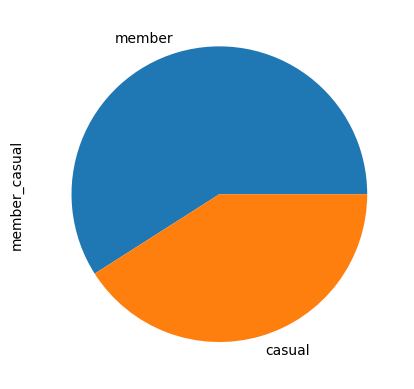

In [42]:
data.member_casual.value_counts().plot(kind='pie');

* Annual Members have a bigger percentage of riders compard to casual riders

### 2. What is the distribution in terms of months?

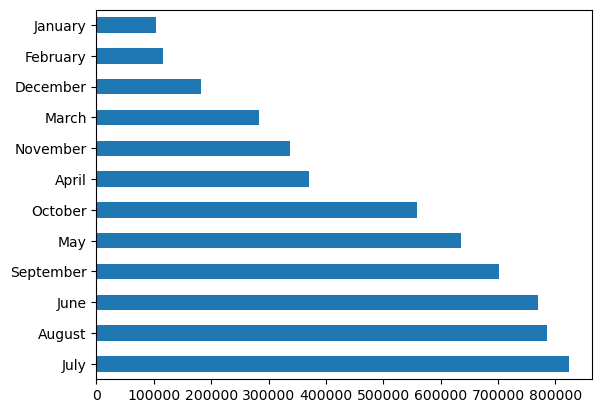

In [39]:
data.month.value_counts().plot(kind='barh');

* July has the most usage in numbers of riders, followed closely by by August and June, while January, February and December are among the least in terms of usage by riders both casual and members.
* From this we can interpret that Summer season has the most rides compared to the Winter season while the rest of the two seasons shares the spoils.

### 3. What is the distribution in terms of ride type?

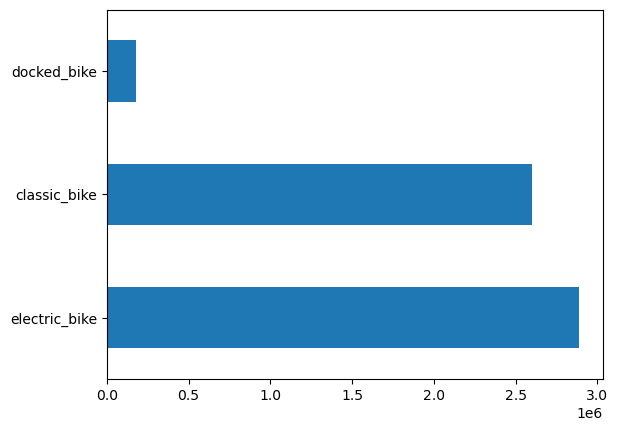

In [44]:
data.rideable_type.value_counts().plot(kind='barh');

* Electric bikes are more common compared to Classic bikes and the least common are the Docked bikes meant for people who are abled differently.

### 4. What is the distribution in terms of days?

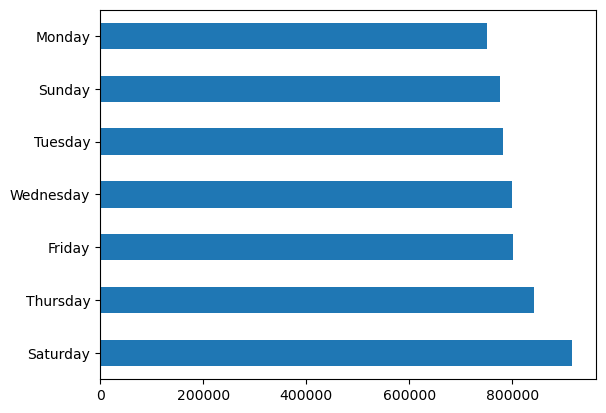

In [41]:
data.day_of_week.value_counts().plot(kind='barh');

* Saturday is the most common day, since it's the most weekend day of the weekend. with Monday having the least usage.

### Conclusions and Recommendations
1. The biggest percentage of members are annual subscribers comapred to casual members
2. The months with the highest usage are **July**, **August** and **June** with the least usage months being, **January**, **February** and **December**; This makes **summer** have the highest usage compared to other seasons.
3. The day of the week with the highest usage is **Saturday** as it is the weekend
4. The most common ride type is the **electric bikes**.
5. The average ride per minute for the 2022 period was **19.44 minutes** with the highest member hiring a bike for close to a full month, in **28.74 days**

### The clean dataset was exported to Tableau for finer visualization